<a href="https://colab.research.google.com/github/peepeepoopooooo/2022-update-shecodes/blob/main/Exploring_IBMQ_with_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install qiskit numpy jupyterlab matplotlib qiskit-ibmq-provider

  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter-server-1.24.0:
      Successfully uninstalled jupyter-server-1.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
notebook 6.5.5 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.6.1 which is incompatible.
notebook 6.5.5 requires pyzmq<25,>=17, but you have pyzmq 25.1.2 which is incompatible.


In [ ]:
import qiskit as qk
%matplotlib inline

circuit = qk.QuantumCircuit(2,2)  # 2qubits 2 bits
circuit.x(0) # change valeur si valeur =0 change 1
circuit.cx(0, 1) #cnot, controlled not, change la 2eme valeur si la premiere est 1
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [ ]:
from qiskit import IBMQ

token = "22c54cd3ba9bccfbc02f948ff2d77bc064f3385254b1f8bd3c2f35c7c964f7dbf872d83857f248bd668624950bab0f0170c35ea76f5b212922c73a8333963c25"
IBMQ.save_account(token)


In [ ]:
IBMQ.load_account()

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
#show providers
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
provider = IBMQ.get_provider("ibm-q")

In [ ]:
for backend in provider.backends():
  try:
    qubit_count = len(backend.properties().quibits)
  except:
    qubit_count = "simulated"
  print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 35 queued and simulated qubits
ibmqx2 has 7 queued and simulated qubits
ibmq_16_melbourne has 1228 queued and simulated qubits
ibmq_vigo has 764 queued and simulated qubits
ibmq_ourense has 725 queued and simulated qubits
ibmq_valencia has 214 queued and simulated qubits
ibmq_armonk has 7 queued and simulated qubits
ibmq_athens has 13 queued and simulated qubits
ibmq_santiago has 7 queued and simulated qubits


In [ ]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmqx2")
job = qk.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


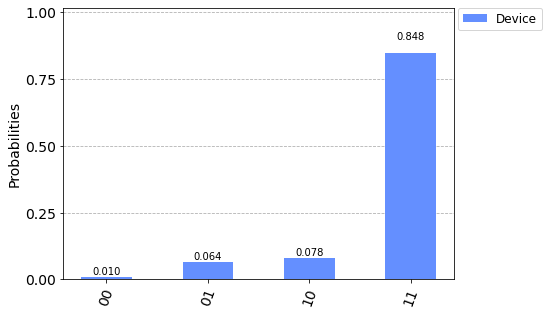

In [ ]:
#result of the job
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [ ]:
circuit2 = qk.QuantumCircuit(2,2)  # 2qubits 2 bits
circuit2.h(0)
circuit2.cx(0, 1) #cnot, controlled not, change la 2eme valeur si la premiere est 1
circuit2.measure([0,1], [0,1])
circuit2.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

Job Status: job has successfully run


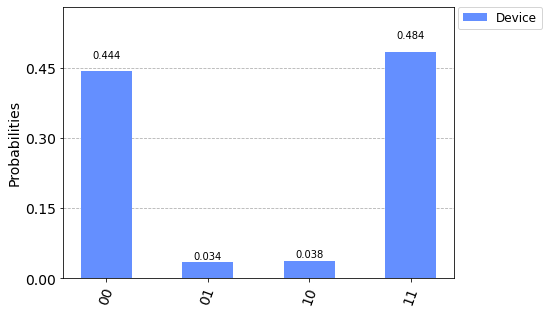

In [ ]:
job = qk.execute(circuit2, backend=backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit2)

plot_histogram([counts], legend=['Device'])